In [9]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
# import plotly.express as px
import os
import time
IMAGES_FOLDER_PATH = "../images"

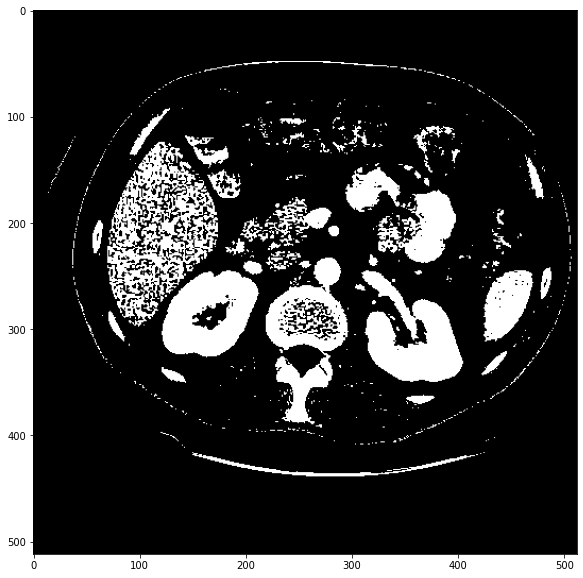

In [10]:
kidney = cv2.imread(os.path.join(IMAGES_FOLDER_PATH, 'kidney.jpg'),0)
# plt.imshow(thumb,cmap='gray')
# plt.show()

ret,kidney = cv2.threshold(kidney,132,255,cv2.THRESH_BINARY)
plt.figure(figsize=(12,10))
plt.imshow(kidney,cmap='gray')
plt.show()
kidney = np.int64(kidney/255)

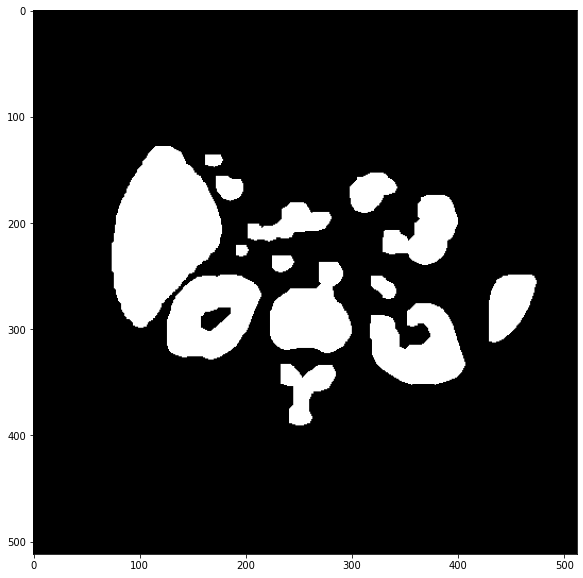

In [11]:
img = kidney.copy() 

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
img = cv2.dilate(np.uint8(img), kernel, iterations = 1)
# plt.imshow(img,cmap='gray')
# plt.show()
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (6, 6))
img = cv2.erode(np.uint8(img), kernel, iterations=3) 
# plt.imshow(img,cmap='gray')
# plt.show()
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (8, 8))
img = cv2.dilate(np.uint8(img), kernel, iterations=2) 
# plt.imshow(img,cmap='gray')
# plt.show()
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2, 2))
img = cv2.erode(img, kernel, iterations = 3)
plt.figure(figsize=(12,10))
plt.imshow(img,cmap='gray')
plt.show()

In [12]:
visited = np.zeros(kidney.shape)
labels = np.zeros(kidney.shape)

import sys
sys.setrecursionlimit(10000000)
def dfs(img,i,j,color):
    if i<0:
        return
    if j<0:
        return
    if i>=img.shape[0]:
        return
    if j>=img.shape[1]:
        return
    if visited[i,j]:
        return
    if img[i,j]==0:
        return
    
    labels[i,j] = color
    visited[i,j] = 1
    
    dfs(img,i-1,j-1,color)
    dfs(img,i-1,j,color)
    dfs(img,i-1,j+1,color)
    dfs(img,i+1,j-1,color)
    dfs(img,i+1,j+1,color)
    dfs(img,i+1,j,color)
    dfs(img,i,j+1,color)
    dfs(img,i,j,color)
    dfs(img,i,j-1,color)
    
    return labels 

In [13]:
def connected_components(img):
    color = 1

    h,w = img.shape
    for i in range(h):
        for j in range(w):
            if visited[i,j]==0 and img[i,j]==1:
                dfs(img,i,j,color)
                color = color + 1
    return labels

In [14]:
kidney = img
labels = connected_components(kidney)

In [15]:
np.unique(labels)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14.])

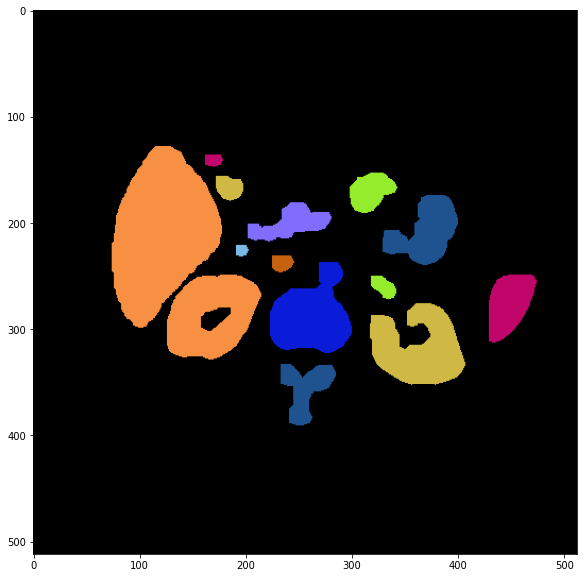

In [18]:
COLORS = [(10, 28, 215), (248, 144, 68), (192, 6, 106), 
          (148, 236, 44), (207, 185, 68), (31, 83, 143), 
          (128, 108, 253), (124,185,232), (196,98,16)
         ]

objects = labels
output = np.zeros((objects.shape[0], objects.shape[1], 3))
for i in range(objects.shape[0]):
    for j in range(objects.shape[1]):
        if labels[i,j]:
            output[i][j] = COLORS[int(labels[i,j] % 9)]

output = np.int64(output)
plt.figure(figsize=(12,10))
plt.imshow(output,cmap='gray')
plt.show()